Name : Gayathri A

Register Number : 212221230028

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

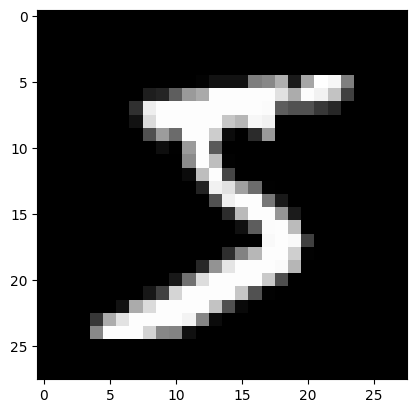

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

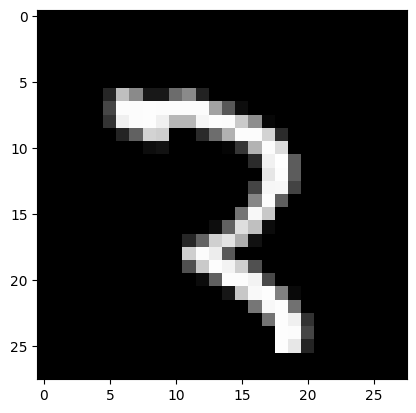

In [19]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [28]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))
metrics = pd.DataFrame(model.history.history)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9923 - loss: 0.0261 - val_accuracy: 0.9836 - val_loss: 0.0529
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 38ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accuracy: 0.9865 - val_loss: 0.0423
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9947 - loss: 0.0163 - val_accuracy: 0.9826 - val_loss: 0.0521
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9960 - loss: 0.0112 - val_accuracy: 0.9860 - val_loss: 0.0462


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


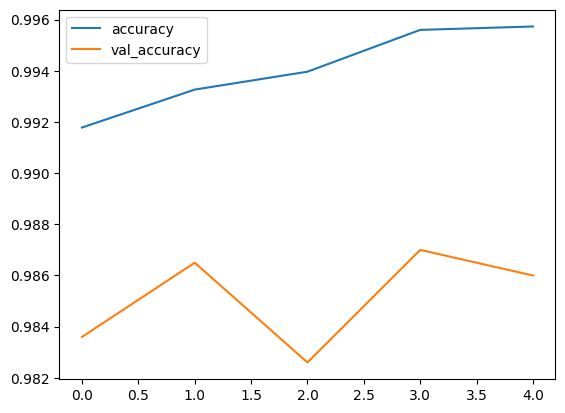

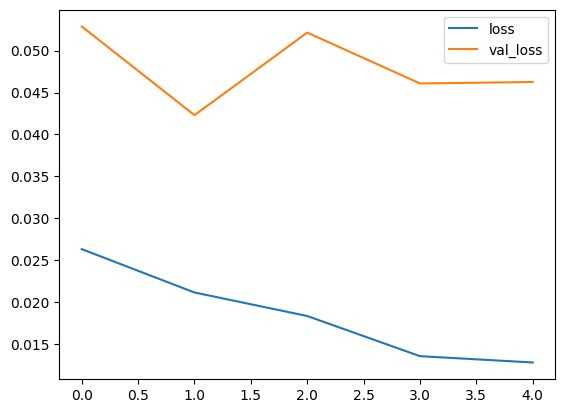

In [32]:
metrics = pd.DataFrame(model.history.history)

metrics.head()

metrics[['accuracy','val_accuracy']].plot()

metrics[['loss','val_loss']].plot()

x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [33]:
print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))

[[ 972    0    2    0    0    0    5    1    0    0]
 [   0 1119    6    0    1    0    4    3    2    0]
 [   2    0 1018    0    1    0    2    5    3    1]
 [   0    0    3  995    0    6    0    3    2    1]
 [   0    0    0    0  973    1    2    1    1    4]
 [   1    0    1    5    0  882    2    0    1    0]
 [   2    1    1    0    1    2  950    0    1    0]
 [   0    0    5    1    1    0    0 1017    1    3]
 [   4    0    5    2    2    2    3    3  951    2]
 [   1    0    1    3    9    3    0    7    2  983]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99   

In [44]:
img = image.load_img('d3.jpg')
type(img)

PIL.Image.Image

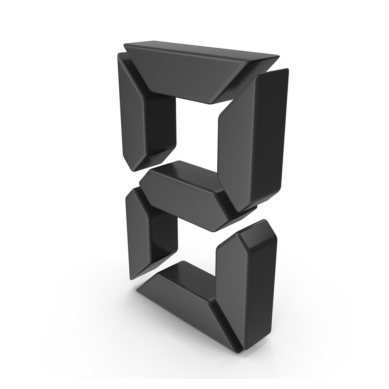

In [45]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [47]:
img = image.load_img('d3.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [48]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

print(x_single_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[8]


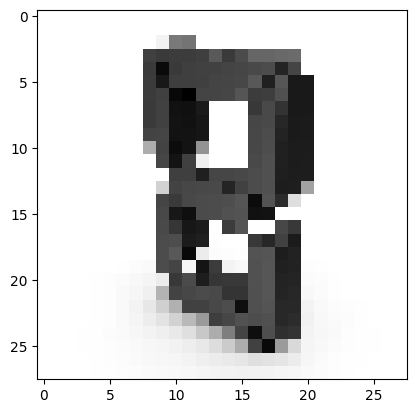

In [49]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [51]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

print(x_single_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[8]
